In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

from utils import gen_cls_data

np.random.seed(456)
tf.set_random_seed(456)
%matplotlib inline

In [3]:
N = 100
w_true = 5
b_true = 2
noise_scale = .1

x_np, y_np = gen_cls_data()

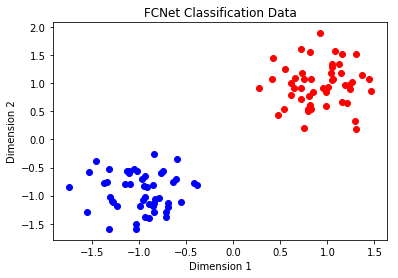

In [13]:
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")

plt.title("FCNet Classification Data")

plt.scatter(x_np[:50,0], x_np[:50, 1], color="blue")
plt.scatter(x_np[50:,0], x_np[50:, 1], color="red")

In [14]:
d = 2
n_hidden = 15

with tf.name_scope("placeholders"):
    x = tf.placeholder(tf.float32, (N, d))
    y = tf.placeholder(tf.float32, (N,))
    
with tf.name_scope("layer1"):
    W = tf.Variable(tf.random_normal((d, n_hidden)))
    b = tf.Variable(tf.random_normal((n_hidden,)))
    x_1 = tf.nn.relu(tf.matmul(x, W) + b)

with tf.name_scope("output"):
    W = tf.Variable(tf.random_normal((n_hidden, 1)))
    b = tf.Variable(tf.random_normal((1,)))
    y_logit = tf.squeeze(tf.matmul(x_1, W) + b)
    
    y_one_prob = tf.sigmoid(y_logit)
    y_pred = tf.round(y_one_prob)
    
with tf.name_scope("loss"):
    entropy = tf.nn.sigmoid_cross_entropy_with_logits(logits=y_logit, labels=y)
    l = tf.reduce_sum(entropy)
    
with tf.name_scope("optim"):
    train_op = tf.train.AdamOptimizer(.001).minimize(l)

with tf.name_scope("summaries"):
    tf.summary.scalar("loss", l)
    merged = tf.summary.merge_all()
    
train_writer = tf.summary.FileWriter('/tmp/fcnet-classification-train',
                                     tf.get_default_graph())

In [15]:
n_steps = 200
with tf.Session() as sess:
  sess.run(tf.global_variables_initializer())
  # Train model
  for i in range(n_steps):
    feed_dict = {x: x_np, y: y_np}
    _, summary, loss = sess.run([train_op, merged, l], feed_dict=feed_dict)
    if i % 10 == 0: print("step %d, loss: %f" % (i, loss))
    train_writer.add_summary(summary, i)

  # Make Predictions
  y_pred_np = sess.run(y_pred, feed_dict={x: x_np})

score = accuracy_score(y_np, y_pred_np)
print("Classification Accuracy: %f" % score)

step 0, loss: 150.982986
step 10, loss: 140.109894
step 20, loss: 129.373962
step 30, loss: 118.745293
step 40, loss: 108.343704
step 50, loss: 98.225418
step 60, loss: 88.204369
step 70, loss: 78.404312
step 80, loss: 69.005043
step 90, loss: 60.408382
step 100, loss: 52.704987
step 110, loss: 45.793648
step 120, loss: 39.622864
step 130, loss: 34.294670
step 140, loss: 29.841303
step 150, loss: 26.102051
step 160, loss: 22.849522
step 170, loss: 20.040733
step 180, loss: 17.707418
step 190, loss: 15.781921
Classification Accuracy: 1.000000
